In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [12]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_data = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()
June_data

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [13]:
#  3. Convert the June temperatures to a list.
June_data = []
June_data = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()


In [14]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(June_data, columns=['Date', 'Temperature'])
df


,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [59]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month f December.
December_data = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()


In [25]:
# 7. Convert the December temperatures to a list.
December_data = []
December_data = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()


In [26]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(December_data, columns=['Date', 'Temperature'])
df

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [60]:
## D3: For results and summary explanation

<AxesSubplot:ylabel='Frequency'>

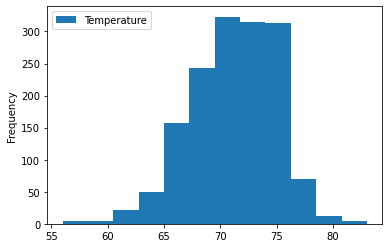

In [23]:
df = pd.DataFrame(December_data, columns=['Date', 'Temperature'])
df.plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

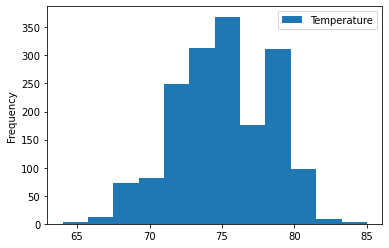

In [24]:
df = pd.DataFrame(June_data, columns=['Date', 'Temperature'])
df.plot.hist(bins=12)

In [56]:
December_data1 = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()
December_data_df = pd.DataFrame(December_data1, columns=['Date', 'Precipitation'])
December_data_df.describe()


,Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:ylabel='Frequency'>

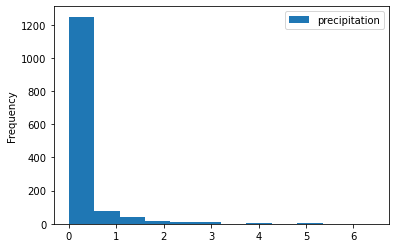

In [55]:
df2 = pd.DataFrame(December_data1, columns=['Date', 'precipitation'])
df2.plot.hist(bins=12)

In [57]:
June_data1 = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()
June_data_df = pd.DataFrame(June_data1, columns=['Date', 'Precipitation'])
June_data_df.describe()


,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:ylabel='Frequency'>

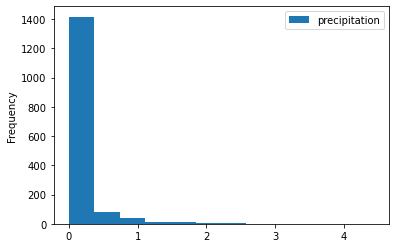

In [58]:
df3 = pd.DataFrame(June_data1, columns=['Date', 'precipitation'])
df3.plot.hist(bins=12)